In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe, transform_to_changes

##### Прочитаем данные о проценте людей, живущих за чертой бедности.
##### Удалим Крымский федеральный округ из данных сразу, поскольку в дальнейшем, если этого не сделать, с ним возникают проблемы.

In [2]:
poverty_percent = pd.read_csv('../social_russia_data/poverty_percent_by_regions_1992_2020.csv', sep=',', index_col=0)
poverty_percent = poverty_percent.drop(index='    Крымский федеральный округ')
poverty_percent.head()

,year,poverty_percent
region,,
Российская Федерация,1992,33.5
Российская Федерация,1993,31.3
Российская Федерация,1994,22.4
Российская Федерация,1995,24.8
Российская Федерация,1996,22.1


##### Как и с таблицей о числе людей с инвалидностью, здесь мы не сможем передать такую таблицу для преобразования в функцию to_modify_dataframe, поэтому предварительно предобработаем её.

In [3]:
frames = []
for region in set(poverty_percent.index):
    frame = poverty_percent.loc[region]
    min_year = int(frame['year'].min())
    max_year = int(frame['year'].max())
    frame = frame.drop(columns='year')
    frames.append(pd.DataFrame(
        data=frame.values.reshape(1, frame.shape[0]),
        index=[region],
        columns=[f'Процент людей за чертой бедности в {i} году' for i in range(min_year, max_year + 1)]
        )
    )
poverty_percent = pd.concat(frames)
poverty_percent.head()

,Процент людей за чертой бедности в 1995 году,Процент людей за чертой бедности в 1996 году,Процент людей за чертой бедности в 1997 году,Процент людей за чертой бедности в 1998 году,Процент людей за чертой бедности в 1999 году,Процент людей за чертой бедности в 2000 году,Процент людей за чертой бедности в 2001 году,Процент людей за чертой бедности в 2002 году,Процент людей за чертой бедности в 2003 году,Процент людей за чертой бедности в 2004 году,...,Процент людей за чертой бедности в 2014 году,Процент людей за чертой бедности в 2015 году,Процент людей за чертой бедности в 2016 году,Процент людей за чертой бедности в 2017 году,Процент людей за чертой бедности в 2018 году,Процент людей за чертой бедности в 2019 году,Процент людей за чертой бедности в 2020 году,Процент людей за чертой бедности в 1992 году,Процент людей за чертой бедности в 1993 году,Процент людей за чертой бедности в 1994 году
Республика Карелия,23.0,20.5,19.0,22.9,25.4,22.3,23.0,18.8,18.9,18.1,...,14.1,16.2,16.7,16.5,15.6,15.7,15.1,NaN,NaN,NaN
Архангельская область,26.2,26.8,23.9,31.6,42.6,33.5,27.4,26.5,23.5,19.6,...,14.8,16.5,15.2,14.3,13.5,13.6,12.8,NaN,NaN,NaN
Кабардино-Балкарская Республика,46.2,44.3,44.2,51.1,51.9,57.5,52.3,36.6,31.7,25.9,...,18.7,21.1,25.8,24.7,24.2,24.2,24.2,NaN,NaN,NaN
Челябинская область,27.9,27.2,22.1,26.9,32.3,30.7,34.3,29.7,24.5,21.1,...,11.7,13.7,13.8,13.2,12.8,12.8,12.6,NaN,NaN,NaN
Республика Бурятия,54.3,48.4,33.0,43.2,47.5,53.5,48.6,37.2,36.7,38.3,...,18.2,18.9,19.3,19.0,19.1,20.1,19.9,NaN,NaN,NaN


In [4]:
poverty_percent = to_modify_dataframe(poverty_percent)
poverty_percent.head()

Число регионов России - 85.


,Процент людей за чертой бедности в 2015 году,Процент людей за чертой бедности в 2016 году,Процент людей за чертой бедности в 2017 году,Процент людей за чертой бедности в 2018 году,Процент людей за чертой бедности в 2019 году,Процент людей за чертой бедности в 2020 году
Республка Карелия,16.2,16.7,16.5,15.6,15.7,15.1
Республика Кабардино-Балкария,21.1,25.8,24.7,24.2,24.2,24.2
Челябинская область,13.7,13.8,13.2,12.8,12.8,12.6
Республика Бурятия,18.9,19.3,19.0,19.1,20.1,19.9
Республика Удмуртия,12.3,12.4,12.2,12.2,12.4,11.9


##### Теперь, когда данные преобразованы в нужный нам вид, посмотрим корреляцию.

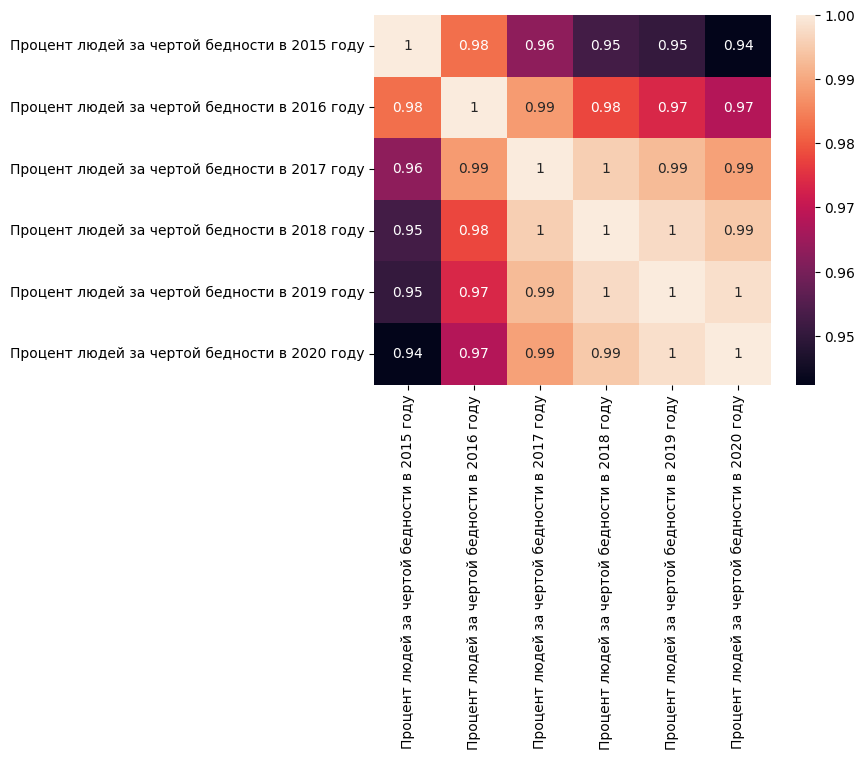

In [5]:
sns.heatmap(poverty_percent.corr(), annot=True);

##### Наблюдаем высокую корреляцию. А потому посмотрим на динамику изменения процента людей, живущих за чертой бедности.

In [6]:
poverty_percent_changes = transform_to_changes(poverty_percent, not_percent=False)
poverty_percent_changes = poverty_percent_changes.rename(
    lambda arg: arg.replace('Процент', 'Динамика процента'), axis=1
)
poverty_percent_changes.head()

,Динамика процента людей за чертой бедности в 2016 году,Динамика процента людей за чертой бедности в 2017 году,Динамика процента людей за чертой бедности в 2018 году,Динамика процента людей за чертой бедности в 2019 году,Динамика процента людей за чертой бедности в 2020 году
Республка Карелия,0.5,-0.2,-0.9,0.1,-0.6
Республика Кабардино-Балкария,4.7,-1.1,-0.5,0.0,0.0
Челябинская область,0.1,-0.6,-0.4,0.0,-0.2
Республика Бурятия,0.4,-0.3,0.1,1.0,-0.2
Республика Удмуртия,0.1,-0.2,0.0,0.2,-0.5


##### Посмотрим на корреляцию теперь.

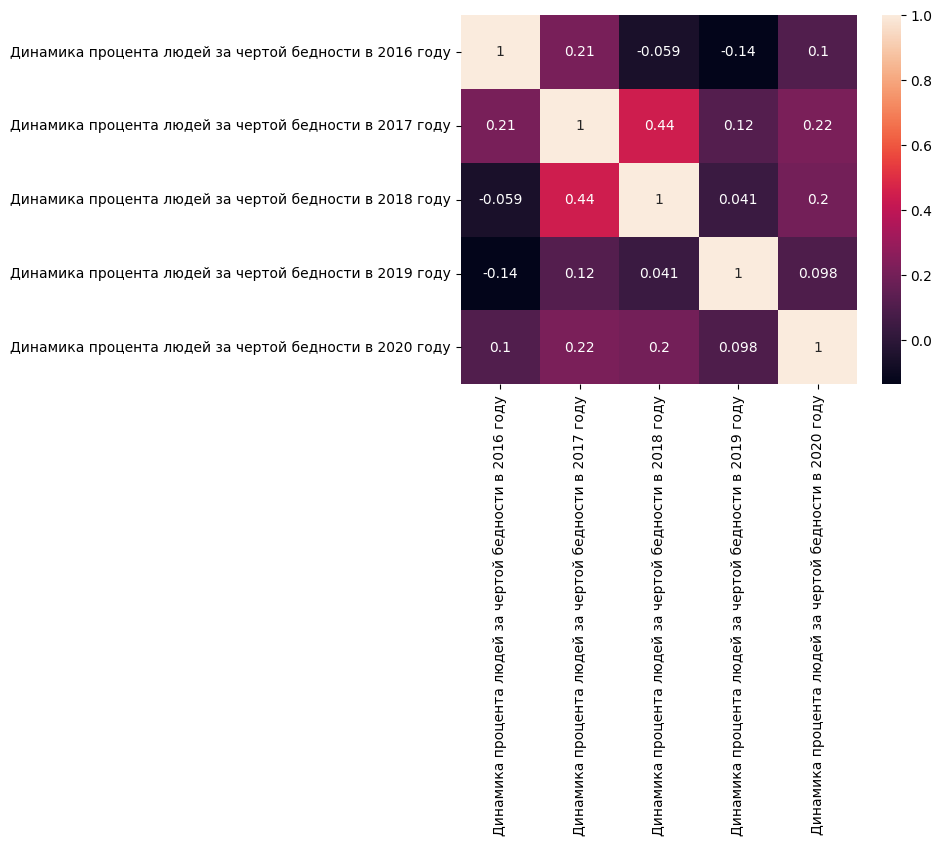

In [7]:
sns.heatmap(poverty_percent_changes.corr(), annot=True);

In [8]:
poverty_percent_changes.to_csv('../datasets_mod/poverty_percent.csv', sep=',')